In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('shared/Project-3_NYC_311_Calls.pkl')

In [3]:
df = df.set_index(pd.DatetimeIndex(df['Created Date']))

del df['Created Date']

In [4]:
# Review the column
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33780977 entries, 2011-04-06 00:00:00 to 2011-04-06 00:00:00
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Unique Key              int64 
 1   Agency                  object
 2   Agency Name             object
 3   Complaint Type          object
 4   Descriptor              object
 5   Location Type           object
 6   Incident Zip            object
 7   City                    object
 8   Resolution Description  object
 9   Borough                 object
 10  Open Data Channel Type  object
dtypes: int64(1), object(10)
memory usage: 3.0+ GB
None
         Unique Key
count  3.378098e+07
mean   3.802665e+07
std    1.209574e+07
min    1.056422e+07
25%    2.793121e+07
50%    3.798303e+07
75%    4.830951e+07
max    5.840682e+07


In [5]:
#Exploring Unique Values and Counts
print(df['Agency'].value_counts())
print(df['Complaint Type'].value_counts())

Agency
NYPD                                            10038478
HPD                                              7990102
DSNY                                             3876410
DOT                                              3852032
DEP                                              2310676
DOB                                              1526608
DPR                                              1417741
DOHMH                                             836975
DOF                                               511033
TLC                                               348292
DHS                                               327274
DCA                                               281744
HRA                                               113953
EDC                                               112179
DFTA                                               95305
OSE                                                70955
DOE                                                23716
3-1-1                   

In [6]:
#Handling Missing Values
print(df.isnull().sum())  # To check missing values

Unique Key                      0
Agency                          0
Agency Name                     0
Complaint Type                  0
Descriptor                 586677
Location Type             7140574
Incident Zip              1507958
City                      1981664
Resolution Description    1254890
Borough                     47074
Open Data Channel Type          0
dtype: int64


In [7]:
#Q1
daily_complaints_2022 = df['Unique Key']['2022'].resample('D').count()
average_daily_complaints_2022 = daily_complaints_2022.mean()
print(f"Average number of daily complaints in 2022: {average_daily_complaints_2022}")

Average number of daily complaints in 2022: 8684.320547945206


In [20]:
#Q2
max_calls_date = df['Unique Key'].resample('D').count().idxmax()
print(f"Date with maximum number of calls: {max_calls_date}")

Date with maximum number of calls: 2020-08-04 00:00:00


In [21]:
#Q3
# Find the date with the maximum number of calls
max_calls_date = df['Unique Key'].resample('D').count().idxmax()

# Filter the dataset for that specific date and find the most common complaint type
most_common_complaint = df.loc[df.index.date == max_calls_date.date()]['Complaint Type'].value_counts().idxmax()
print(f"Most common complaint on {max_calls_date.date()}: {most_common_complaint}")

Most common complaint on 2020-08-04: Damaged Tree


In [22]:
#Q4
# Group the data by months and find the month with the fewest number of calls
quietest_month = df['Unique Key'].resample('M').count().idxmin().strftime("%b")
print(f"Quietest month historically: {quietest_month}")

Quietest month historically: Aug


In [23]:
#Q5
from statsmodels.tsa.seasonal import seasonal_decompose

# Resample the series to a daily frequency
daily_series = df['Unique Key'].resample('D').count()

# Perform ETS decomposition based on an additive model
result = seasonal_decompose(daily_series, model='additive')

# Get the seasonal component value on 2020-12-25, rounded to the nearest integer
seasonal_component = result.seasonal['2020-12-25'].round()
print(f"Seasonal component on 2020-12-25: {seasonal_component}")

Seasonal component on 2020-12-25: 183.0


In [24]:
#Q6
# Calculate the autocorrelation with a lag of 1
autocorrelation = daily_series.autocorr(lag=1)
print(f"Autocorrelation with lag of 1: {autocorrelation}")

Autocorrelation with lag of 1: 0.7517059728398577


In [28]:
#Q7
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for Prophet (requires 'ds' and 'y' columns)
# Ensure that 'ds' is datetime and 'y' is the column with values
prophet_df = daily_series.reset_index()
prophet_df.columns = ['ds', 'y']

# Convert 'ds' to datetime if it's not already
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])

# Split the data into training and test sets (last 90 days as test set)
train = prophet_df.iloc[:-90]
test = prophet_df.iloc[-90:]

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train)

# Make future dataframe for the next 90 days and predict
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Calculate RMSE on the test set
test_forecast = forecast.set_index('ds').loc[test['ds']]
rmse = np.sqrt(mean_squared_error(test['y'], test_forecast['yhat']))
print(f"RMSE on test set: {rmse}")


14:50:00 - cmdstanpy - INFO - Chain [1] start processing
14:50:01 - cmdstanpy - INFO - Chain [1] done processing


RMSE on test set: 1231.513760758433


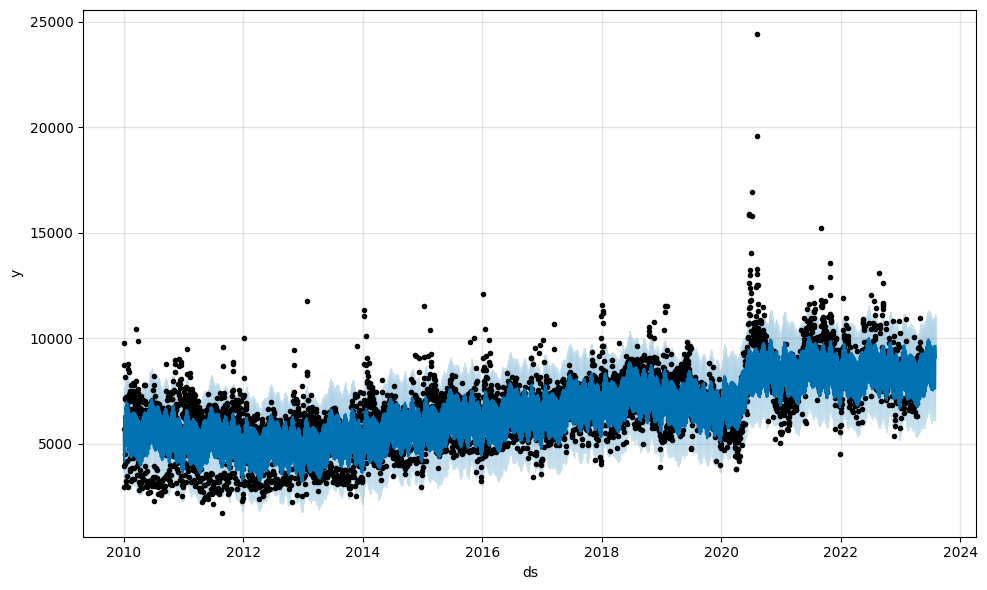

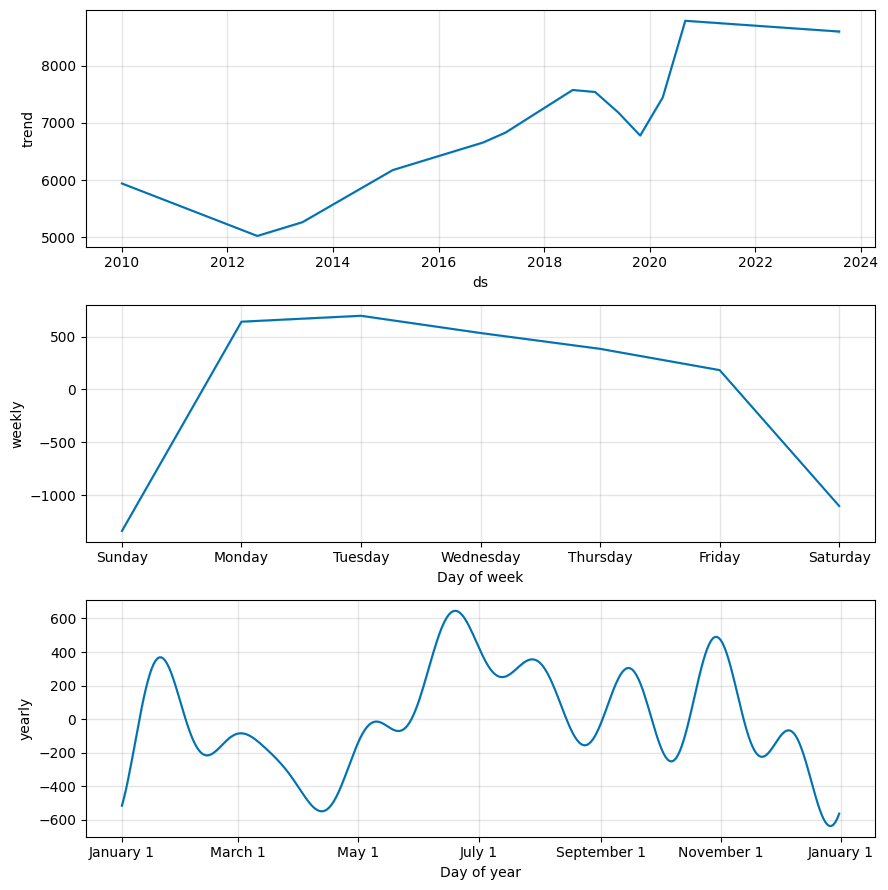

In [29]:
from prophet.plot import plot, plot_components

# Plot the forecast using Matplotlib
fig1 = plot(model, forecast)
plt.show(fig1)

# Plot forecast components
fig2 = plot_components(model, forecast)
plt.show(fig2)

In [30]:
#Data Cleaning Try
df_clean = df.dropna()  # Example to drop rows with NaNs

In [9]:
# Review the column
print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24210882 entries, 2011-04-06 00:00:00 to 2011-04-06 00:00:00
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Unique Key              int64 
 1   Agency                  object
 2   Agency Name             object
 3   Complaint Type          object
 4   Descriptor              object
 5   Location Type           object
 6   Incident Zip            object
 7   City                    object
 8   Resolution Description  object
 9   Borough                 object
 10  Open Data Channel Type  object
dtypes: int64(1), object(10)
memory usage: 2.2+ GB
None
         Unique Key
count  2.421088e+07
mean   3.801151e+07
std    1.227048e+07
min    1.056422e+07
25%    2.775116e+07
50%    3.751387e+07
75%    4.967207e+07
max    5.840682e+07


In [10]:
# Convert object columns to category if they have a limited set of unique values
for col in df_clean.select_dtypes(include=['object']).columns:
    num_unique_values = len(df_clean[col].unique())
    num_total_values = len(df_clean[col])
    if num_unique_values / num_total_values < 0.5:
        df_clean[col] = df_clean[col].astype('category')

# Ensure datetime fields are in datetime format (if not already)
df_clean.index = pd.to_datetime(df_clean.index)


/tmp/ipykernel_496/2000040085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype('category')
/tmp/ipykernel_496/2000040085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = df_clean[col].astype('category')
/tmp/ipykernel_496/2000040085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [11]:
# Define a function to process each chunk
def process_chunk(chunk):
    return chunk.resample('M').size()

# Initialize an empty Series to store the result
monthly_counts = pd.Series(dtype='int')

# Process the DataFrame in chunks
chunk_size = 500000  # Define a suitable chunk size
for start in range(0, len(df_clean), chunk_size):
    chunk = df_clean[start:start + chunk_size]
    monthly_counts = monthly_counts.add(process_chunk(chunk), fill_value=0)

print(monthly_counts)


Created Date
2010-01-31    140960.0
2010-02-28    121456.0
2010-03-31    140987.0
2010-04-30    116569.0
2010-05-31    114758.0
                ...   
2023-04-30    198042.0
2023-05-31    221037.0
2023-06-30    205442.0
2023-07-31    205688.0
2023-08-31     18185.0
Freq: M, Length: 164, dtype: float64


In [12]:
#Date-Based Analysis
# Resampling data on a monthly basis for example
monthly_data = df_clean.resample('M').size()
print(monthly_data)

Created Date
2010-01-31    140960
2010-02-28    121456
2010-03-31    140987
2010-04-30    116569
2010-05-31    114758
               ...  
2023-04-30    198042
2023-05-31    221037
2023-06-30    205442
2023-07-31    205688
2023-08-31     18185
Freq: M, Length: 164, dtype: int64


In [13]:
#Categorical Data Analysis
# Frequency of complaints by City
print(df_clean['City'].value_counts())

City
BROOKLYN          7685258
BRONX             5291435
NEW YORK          4705557
STATEN ISLAND     1091703
JAMAICA            434000
                   ...   
L.I.                    1
LAKE PEAKSKILL          1
LAKE WORTH              1
LAKESTONE               1
syosset                 1
Name: count, Length: 1172, dtype: int64


In [14]:
#Extract Earliest and Latest Dates
earliest_date = df_clean.index.min()
latest_date = df_clean.index.max()
print(f"Earliest Date: {earliest_date}")
print(f"Latest Date: {latest_date}")

Earliest Date: 2010-01-01 00:00:00
Latest Date: 2023-08-04 12:00:00


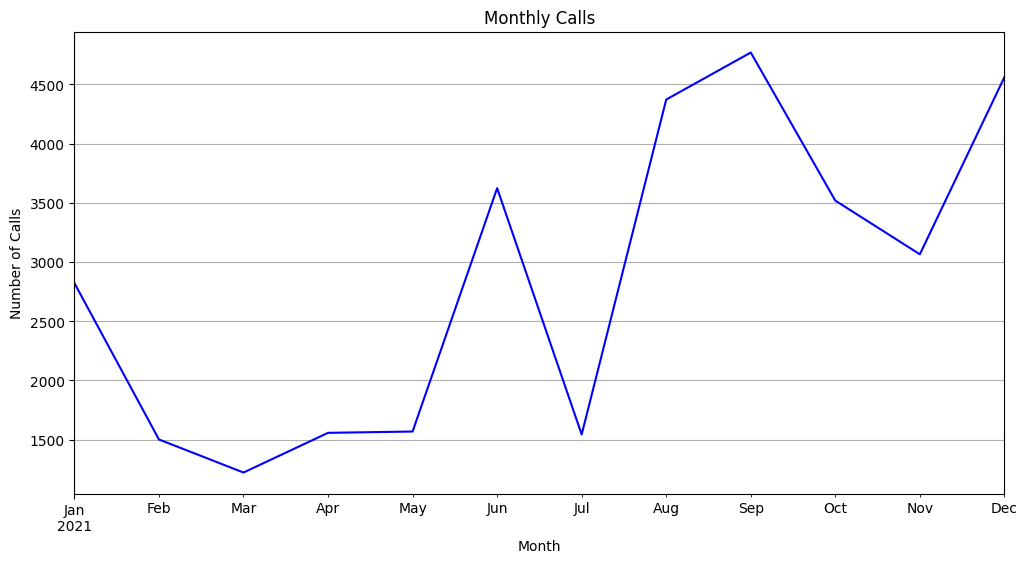

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Simulating monthly data
monthly_data_sample = pd.date_range(start='2021-01-01', end='2021-12-31', freq='M')
monthly_calls = np.random.randint(1000, 5000, size=len(monthly_data_sample))
monthly_data = pd.Series(data=monthly_calls, index=monthly_data_sample)

# Creating the plot
plt.figure(figsize=(12, 6))
monthly_data.plot(kind='line', color='blue')
plt.title('Monthly Calls')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.grid(True)
plt.show()

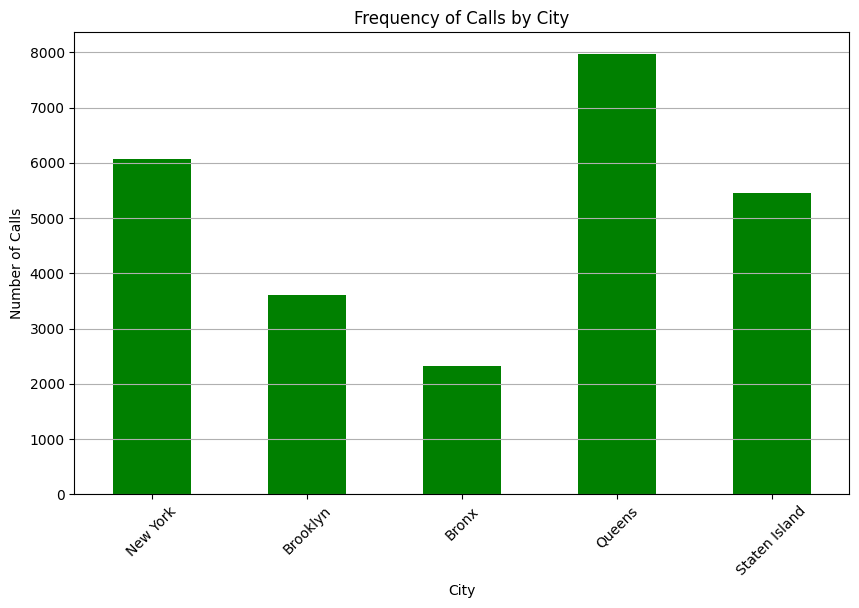

In [16]:
# Simulating city data
cities = ['New York', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']
call_counts = np.random.randint(1000, 10000, size=len(cities))
city_data = pd.Series(data=call_counts, index=cities)

# Creating the plot
plt.figure(figsize=(10, 6))
city_data.plot(kind='bar', color='green')
plt.title('Frequency of Calls by City')
plt.xlabel('City')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()